
# **Image Colorization With GANs**

GANs are the state-of-the-art machine learning models which can generate new data instances from existing ones. They use a very interesting technique, inspired from the Game Theory, to generate realistic samples. 

In this notebook, we'll use GANs to colorize a grayscale ( B/W ) image. In addition to that, our generator model will have a structure similar to that of a UNet i.e the one with skip connections.



## **1. Downloading and Processing the data**

A dataset of RGB images to train the GAN model whose images consists of various scenes/places.

* Download the dataset on your machine from [here](https://drive.google.com/file/d/1sQ5C8HiKVr2Edp3ojLLNauwRbOLfVn2q/view?usp=sharing). 
* Upload the downloaded `.zip` file here on Colab.







In [ ]:
#Drive mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os import listdir
#Drive path 
path ='/content/drive/MyDrive/Deep Learning/'

In [ ]:
# Data set checking in Drive
for images in os.listdir(path):
    # check if the image ends with png
    if (images.endswith(".jpg")):
        print(images)

22903.jpg
22967.jpg
22913.jpg
22953.jpg
22936.jpg
22935.jpg
22963.jpg
22964.jpg
22973.jpg
22899.jpg
22974.jpg
22920.jpg
22951.jpg
22924.jpg
22942.jpg
22954.jpg
22917.jpg
22933.jpg
22969.jpg
22965.jpg
22948.jpg
22955.jpg
22911.jpg
22960.jpg
22956.jpg
22944.jpg
22925.jpg
22962.jpg
22971.jpg
22952.jpg
22915.jpg
22919.jpg
22927.jpg
22898.jpg
22950.jpg
22908.jpg
22900.jpg
22907.jpg
22966.jpg
22938.jpg
22928.jpg
22949.jpg
22912.jpg
22897.jpg
22959.jpg
22961.jpg
22934.jpg
22921.jpg
22947.jpg
22941.jpg
22958.jpg
22943.jpg
22970.jpg
23061.jpg
23014.jpg
23062.jpg
22990.jpg
23040.jpg
23049.jpg
23037.jpg
22986.jpg
23065.jpg
22991.jpg
22994.jpg
22993.jpg
23042.jpg
22983.jpg
23003.jpg
23048.jpg
23006.jpg
23001.jpg
22998.jpg
22987.jpg
23051.jpg
23009.jpg
23036.jpg
23005.jpg
23033.jpg
22989.jpg
22976.jpg
23047.jpg
23052.jpg
22980.jpg
22982.jpg
23022.jpg
23058.jpg
23060.jpg
23018.jpg
23023.jpg
23032.jpg
22978.jpg
23002.jpg
22992.jpg
23067.jpg
23026.jpg
22995.jpg
23024.jpg
23053.jpg
22977.jpg
23031.jpg


In [ ]:
#Concating the path with files
import glob
for name in glob.glob(path+'*'):
    print(name)

/content/drive/MyDrive/Deep Learning/22903.jpg
/content/drive/MyDrive/Deep Learning/22967.jpg
/content/drive/MyDrive/Deep Learning/22913.jpg
/content/drive/MyDrive/Deep Learning/22953.jpg
/content/drive/MyDrive/Deep Learning/22936.jpg
/content/drive/MyDrive/Deep Learning/22935.jpg
/content/drive/MyDrive/Deep Learning/22963.jpg
/content/drive/MyDrive/Deep Learning/22964.jpg
/content/drive/MyDrive/Deep Learning/22973.jpg
/content/drive/MyDrive/Deep Learning/22899.jpg
/content/drive/MyDrive/Deep Learning/22974.jpg
/content/drive/MyDrive/Deep Learning/22920.jpg
/content/drive/MyDrive/Deep Learning/22951.jpg
/content/drive/MyDrive/Deep Learning/22924.jpg
/content/drive/MyDrive/Deep Learning/22942.jpg
/content/drive/MyDrive/Deep Learning/22954.jpg
/content/drive/MyDrive/Deep Learning/22917.jpg
/content/drive/MyDrive/Deep Learning/22933.jpg
/content/drive/MyDrive/Deep Learning/22969.jpg
/content/drive/MyDrive/Deep Learning/22965.jpg
/content/drive/MyDrive/Deep Learning/22948.jpg
/content/driv

We are creating a preprocessing model by converting the RGB image to Grey scale image using convert method. The RGB image is kept as the Ground image to make sure we compare the predicted image to the actual image using Deep learing Techniques using GAN

We are spliting the dataset using train_test_split as 2500 images as the train dataset and 500 images as test dataset.

In [ ]:
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from keras.utils.vis_utils import plot_model
from matplotlib import image
from matplotlib import pyplot as plt
import os
import time
import tensorflow as tf
from tensorflow import keras
tf.config.run_functions_eagerly(True)

# The batch size we'll use for training
batch_size = 64

# Size of the image required to train our model
img_size = 120

# These many images will be used from the data archive
dataset_split = 2500

dir_path = path
x = []
y = []
for image_file in os.listdir( dir_path )[ 0 : dataset_split ]:
    rgb_image = Image.open( os.path.join( dir_path , image_file ) ).resize( ( img_size , img_size ) )
    # Normalize the RGB image array
    rgb_img_array = (np.asarray( rgb_image ) ) / 255
    gray_image = rgb_image.convert( 'L' )
    # Normalize the grayscale image array
    gray_img_array = ( np.asarray( gray_image ).reshape( ( img_size , img_size , 1 ) ) ) / 255
    # Append both the Grey scale array and the RBG Scale array images
    x.append( gray_img_array )
    y.append( rgb_img_array )

# Train-test splitting
train_x, test_x, train_y, test_y = train_test_split( np.array(x) , np.array(y) , test_size=0.1 )

# Construct tesnor flow Dataset object for the training
dataset = tf.data.Dataset.from_tensor_slices( ( train_x , train_y ) )
dataset = dataset.batch( batch_size )



## **2. The GAN**
The GAN model works on Generator and Discriminator. The data is passed to GAN model step by step and the loss function is checked for both the Generator and the Discriminator.


### **A. Generator** 

The Generator function works based on converting the Grey scale images to RGB image. 

Using generator we are using the tensor shape by using the batch size $( \ batch \ size \ , \ 120 \ , \ 120 \ , \ 1 \ )$ and the output $G(x)$ will have a shape $( \ batch \ size \ , \ 120 \ , \ 120 \ , \ 3 \ )$

We are using the generator as similar to Encoder-Decoder from the UNet architecture.  

In [ ]:
def get_generator_model():

    inputs = tf.keras.layers.Input( shape=( img_size , img_size , 1 ) )

    conv1 = tf.keras.layers.Conv2D( 16 , kernel_size=( 5 , 5 ) , strides=1 )( inputs )
    conv1 = tf.keras.layers.LeakyReLU()( conv1 )
    conv1 = tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1)( conv1 )
    conv1 = tf.keras.layers.LeakyReLU()( conv1 )
    conv1 = tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1)( conv1 )
    conv1 = tf.keras.layers.LeakyReLU()( conv1 )

    conv2 = tf.keras.layers.Conv2D( 32 , kernel_size=( 5 , 5 ) , strides=1)( conv1 )
    conv2 = tf.keras.layers.LeakyReLU()( conv2 )
    conv2 = tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 )( conv2 )
    conv2 = tf.keras.layers.LeakyReLU()( conv2 )
    conv2 = tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 )( conv2 )
    conv2 = tf.keras.layers.LeakyReLU()( conv2 )

    conv3 = tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 )( conv2 )
    conv3 = tf.keras.layers.LeakyReLU()( conv3 )
    conv3 = tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 )( conv3 )
    conv3 = tf.keras.layers.LeakyReLU()( conv3 )
    conv3 = tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 )( conv3 )
    conv3 = tf.keras.layers.LeakyReLU()( conv3 )

    bottleneck = tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='tanh' , padding='same' )( conv3 )

    concat_1 = tf.keras.layers.Concatenate()( [ bottleneck , conv3 ] )
    conv_up_3 = tf.keras.layers.Conv2DTranspose( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' )( concat_1 )
    conv_up_3 = tf.keras.layers.Conv2DTranspose( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' )( conv_up_3 )
    conv_up_3 = tf.keras.layers.Conv2DTranspose( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' )( conv_up_3 )

    concat_2 = tf.keras.layers.Concatenate()( [ conv_up_3 , conv2 ] )
    conv_up_2 = tf.keras.layers.Conv2DTranspose( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' )( concat_2 )
    conv_up_2 = tf.keras.layers.Conv2DTranspose( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' )( conv_up_2 )
    conv_up_2 = tf.keras.layers.Conv2DTranspose( 32 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' )( conv_up_2 )

    concat_3 = tf.keras.layers.Concatenate()( [ conv_up_2 , conv1 ] )
    conv_up_1 = tf.keras.layers.Conv2DTranspose( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu')( concat_3 )
    conv_up_1 = tf.keras.layers.Conv2DTranspose( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu')( conv_up_1 )
    conv_up_1 = tf.keras.layers.Conv2DTranspose( 3 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu')( conv_up_1 )

    model = tf.keras.models.Model( inputs , conv_up_1 )
    return model


### **B. Discriminator**



### **B. Discriminator**

The discriminator model, represented as $D$, will take in the *real image* $y$ ( from the training data ) and the *generated image* $G(x)$ ( from the generator ) to output two probabilities.

* We train the discriminator in such a manner that is able to differentiate the *real images* and the generated *images*. So, we train the model such that $y$ produces a output of $1.0$ and $G(x)$ produces an output of $0.0$.
* Note that instead of using hard labels like $1.0$ and $0.0$, we use soft labels which are close to 1 and 0. So for a hard label of $1.0$, the soft label will be $(1 - \epsilon)$ where $\epsilon$ is picked uniformly from $( 0 , 0.1 ]$


In [ ]:
def get_discriminator_model():
    layers = [
        tf.keras.layers.Conv2D( 32 , kernel_size=( 7 , 7 ) , strides=1 , activation='relu' , input_shape=( 120 , 120 , 3 ) ),
        tf.keras.layers.Conv2D( 32 , kernel_size=( 7, 7 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1, activation='relu'  ),
        tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense( 512, activation='relu'  )  ,
        tf.keras.layers.Dense( 128 , activation='relu' ) ,
        tf.keras.layers.Dense( 16 , activation='relu' ) ,
        tf.keras.layers.Dense( 1 , activation='sigmoid' ) 
    ]
    model = tf.keras.models.Sequential( layers )
    return model



### **C. Loss Functions**

We are implementing the GAN model using loss functions. we are using L2 loss and MSE loss. We are using the optimizer with the learning rate of 0.0005.


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()
mse = tf.keras.losses.MeanSquaredError()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output) - tf.random.uniform( shape=real_output.shape , maxval=0.1 ) , real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output) + tf.random.uniform( shape=fake_output.shape , maxval=0.1  ) , fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output , real_y):
    real_y = tf.cast( real_y , 'float32' )
    return mse( fake_output , real_y )

generator_optimizer = tf.keras.optimizers.Adam( 0.0005 )
discriminator_optimizer = tf.keras.optimizers.Adam( 0.0005 )

generator = get_generator_model()
discriminator = get_discriminator_model()
#used Checkpoints to save the model to load it for future model usage
#checkpoint_generator_path = '/content/drive/MyDrive/Training/generator'
#checkpoint_discriminator_path = '/content/drive/MyDrive/Training/discriminator'



## **3. Training The GAN**




In [ ]:
@tf.function
def train_step( input_x , real_y ):
   
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # Generate an image -> G( x )
        generated_images = generator( input_x , training=True)
        # Probability that the given image is real -> D( x )
        real_output = discriminator( real_y, training=True)
        # Probability that the given image is the one generated -> D( G( x ) )
        generated_output = discriminator(generated_images, training=True)
        
        # L2 Loss -> || y - G(x) ||^2
        gen_loss = generator_loss( generated_images , real_y )
        # Log loss for the discriminator
        disc_loss = discriminator_loss( real_output, generated_output )
        
        losses["D"].append(disc_loss.numpy())
        losses["G"].append(gen_loss.numpy())
    #tf.keras.backend.print_tensor( tf.keras.backend.mean( gen_loss ) )
    #tf.keras.backend.print_tensor( gen_loss + disc_loss )
    
    # Compute the gradients
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # Optimize with Adam
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

generator.compile(
    optimizer=generator_optimizer,
    loss=generator_loss,
    metrics=['accuracy']
)
#generator.save_weights(checkpoint_generator_path)

discriminator.compile(
    optimizer=discriminator_optimizer,
    loss=discriminator_loss,
    metrics=['accuracy']
)
#discriminator.save_weights(checkpoint_discriminator_path)


## Visualising the Generator model

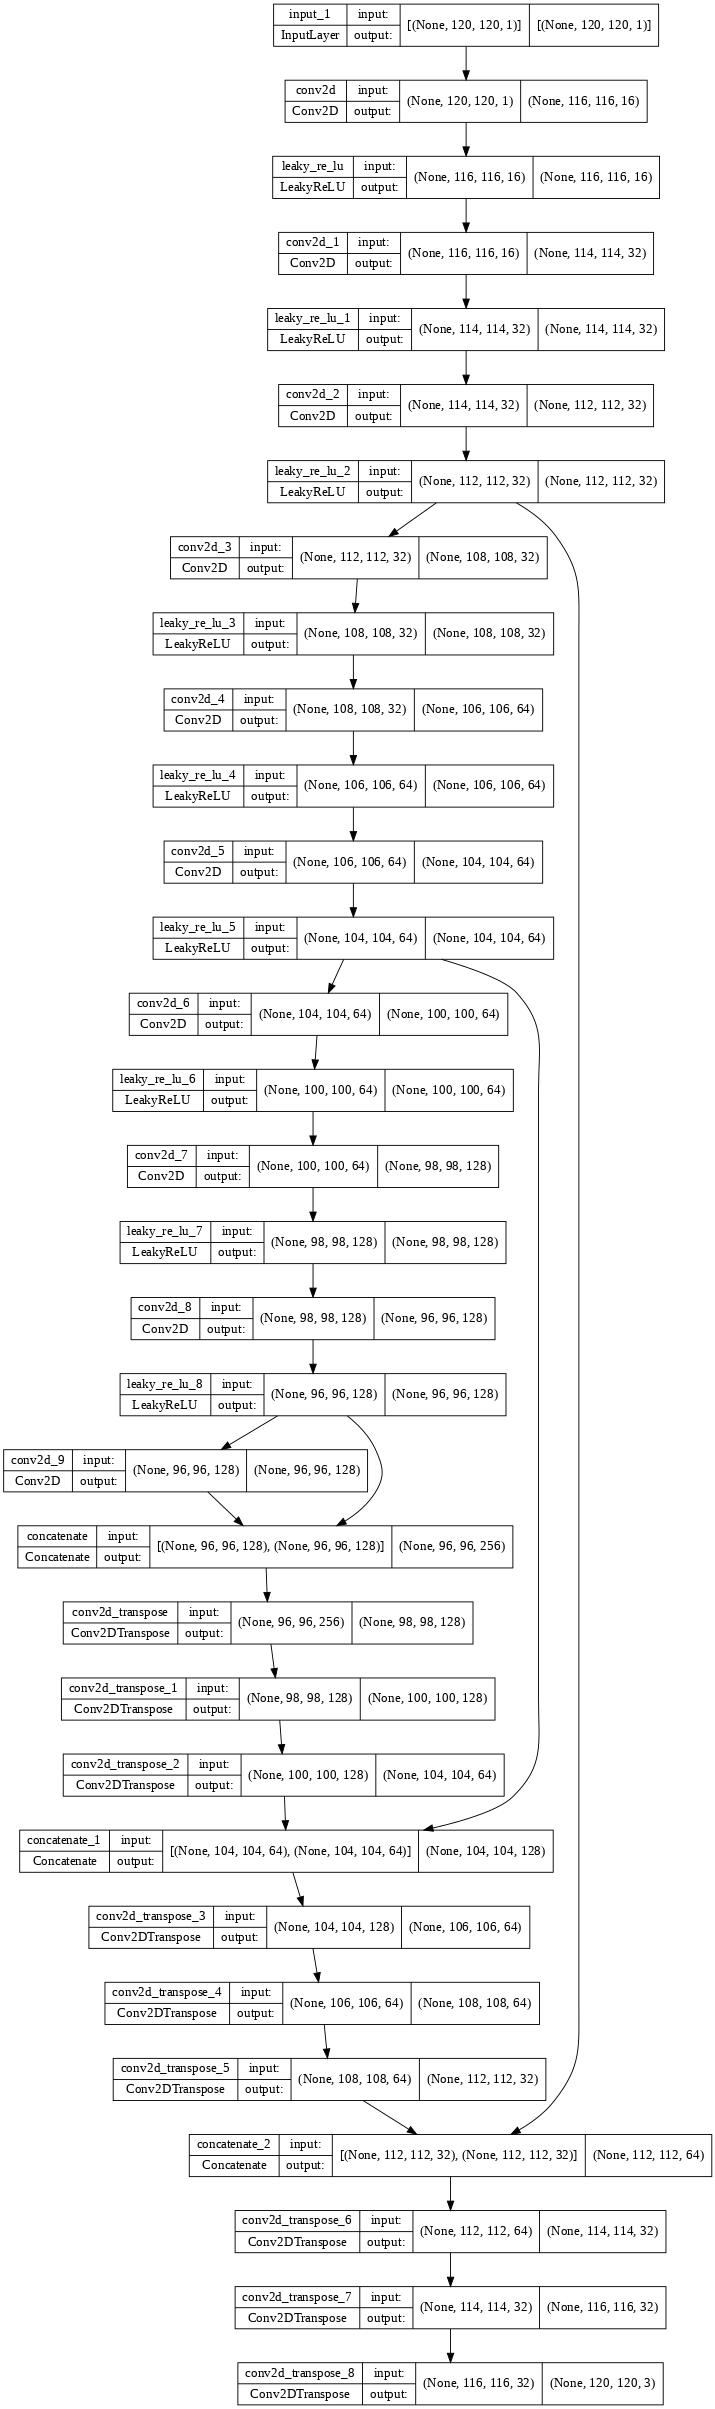

In [ ]:
plot_model(generator, to_file='generator.png', show_shapes=True, show_layer_names=True, dpi=66)

# Trainning data

In [ ]:
def plot_loss(losses):
    """
    @losses.keys():
        0: loss
        1: accuracy
    """
    g_loss = []
    d_loss = []

    count = 0
    for i in losses['D']:
      count += 1
      if(count == 36):
        d_loss.append(i)
        count = 0

    count = 0   
    for i in losses['G']:
      count += 1
      if(count == 36):
        g_loss.append(i)
        count = 0

    plt.figure(figsize=(10,8))
    plt.plot(d_loss, label="Discriminator loss")
    plt.plot(g_loss, label="Generator loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


## **4. Results**

We are plotting the image after the model is trained and the prdicted image is obtained. The image is compared with the Ground image and the predicted image.

In [ ]:
y = generator( test_x[0 : ] ).numpy()

The No.of Epochs are used to train the model 

In [ ]:
# Please have a look at the Notebook in pdf form that was train on 50 epoc.
num_epochs = 50
losses = {"D":[], "G":[]}
for e in range( num_epochs ):
    print("Running epoch : ", e )
    for ( x , y ) in dataset:
        # Here ( x , y ) represents a batch from our training dataset.
        # print( x.shape )
        train_step( x , y )

Running epoch :  0
Running epoch :  1
Running epoch :  2
Running epoch :  3
Running epoch :  4
Running epoch :  5
Running epoch :  6
Running epoch :  7
Running epoch :  8
Running epoch :  9
Running epoch :  10
Running epoch :  11
Running epoch :  12
Running epoch :  13
Running epoch :  14
Running epoch :  15
Running epoch :  16
Running epoch :  17
Running epoch :  18
Running epoch :  19
Running epoch :  20
Running epoch :  21
Running epoch :  22
Running epoch :  23
Running epoch :  24
Running epoch :  25
Running epoch :  26
Running epoch :  27
Running epoch :  28
Running epoch :  29
Running epoch :  30
Running epoch :  31
Running epoch :  32
Running epoch :  33
Running epoch :  34
Running epoch :  35
Running epoch :  36
Running epoch :  37
Running epoch :  38
Running epoch :  39
Running epoch :  40
Running epoch :  41
Running epoch :  42
Running epoch :  43
Running epoch :  44
Running epoch :  45
Running epoch :  46
Running epoch :  47
Running epoch :  48
Running epoch :  49


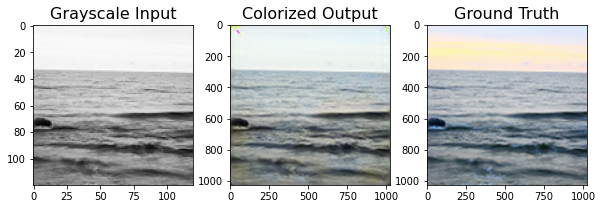

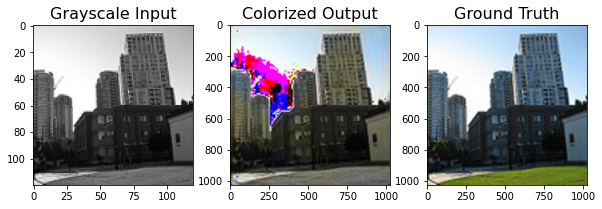

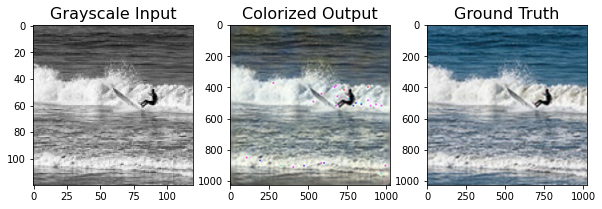

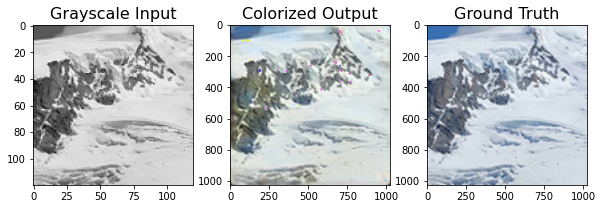

In [ ]:
#printing the image with the results obtained 
for i in range(11, 33, 7):
  plt.figure(figsize=(10,10))
  or_image = plt.subplot(3,3,1)
  or_image.set_title('Grayscale Input', fontsize=16)
  plt.imshow( test_x[i].reshape((120,120)) , cmap='gray' )

  in_image = plt.subplot(3,3,2)    
  image = Image.fromarray( ( y[i] * 255 ).astype( 'uint8' ) ).resize( ( 1024 , 1024 ) )
  image = np.asarray( image )
  in_image.set_title('Colorized Output', fontsize=16)
  plt.imshow( image )

  ou_image = plt.subplot(3,3,3)
  image = Image.fromarray( ( test_y[i] * 255 ).astype( 'uint8' ) ).resize( ( 1024 , 1024 ) )
  ou_image.set_title('Ground Truth', fontsize=16)
  plt.imshow( image )

  plt.show()